# Automatic recognition of a positive or negative review

Using [Yelp Open Dataset](https://www.yelp.com/dataset) this task will classify the reviews into positive and negative. Go ahead to learn more about it.

### Used libraries
[Pandas](https://pandas.pydata.org/): most common, open source data analysis and manipulation tool.

[NumPy](https://numpy.org/): used for mathematical support for some processes.

[Matplotlib](https://matplotlib.org/): library used to create plots and interactive visualizations for our data.

[text_processing](): our functions used for text manipulation.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import text_processing

## Get reviews dataset
The reviews dataset was the first one that we used. It consists of the following features:
- `review_id` [string, 22 character unique review id]
- `user_id` [string, 22 character unique user id, maps to the user in user.json]
- `business_id` [string, 22 character business id, maps to business in business.json]
- `stars` [integer, star rating]
- `date` [string, date formatted YYYY-MM-DD]
- `text` [string, the review itself]
- `useful` [integer, number of useful votes received by review]
- `funny` [integer, number of funny votes received by review]
- `cool` [integer, number of cool votes received by review]

In order to increment performances on our computers we dropped some rows

In [58]:
df_review = pd.read_csv('../dataset/df_review_final.csv')

In [59]:
df_review = df_review.iloc[498000:, :]
df_review = df_review.reset_index()

print(df_review.shape)
df_review.head(5)

(2000, 12)


,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,498000,498000,6988282,L6zsWEUDU9YXUebwpgAgqg,Ug-LDocy4K5BXSWCeSiUwA,Jf0tFhcFPVCLQX74YzzuIw,5.0,1.0,0.0,0.0,The food here is pretty delicious. Highly reco...,2017-01-21 03:01:25
1,498001,498001,6988283,a0K0z2CYdjzNhbaNtamfwA,Ks-94uQxlUzqtvXA-avP3A,G7NoESFUK571kBSlr-1AFA,1.0,1.0,0.0,0.0,I made the mistake of getting the Vernon on gl...,2015-09-12 22:14:13
2,498002,498002,6988284,UOFe76zu9BDiw_p2sZlV3A,in1MBQZJXjWyPXeM1xgZ0A,PXbA_eou5-TdVq_yeIPQBw,3.0,0.0,0.0,0.0,"I love this place for clothes, but the staff i...",2022-01-08 22:32:23
3,498003,498003,6988285,RqhtufpeCo8IWJu2EP6NfQ,iEhpkdXhqA6ozUBwKYPPPA,X-qZBwsuOVwxjFFChEsW3A,3.0,2.0,0.0,0.0,Recently opened in Westmount Mall so I had to ...,2015-07-13 23:44:26
4,498004,498004,6988286,VjZxWK3DXOLHYsvVR_3xBw,3OIheSDSxLVbHxRJgUKJCA,k1yDRDZ4QCvNW9Wm9-IOaA,4.0,1.0,0.0,0.0,Very nice restaurant. Home cooking style servi...,2018-08-03 02:02:44


### Create label
A label is needed to train machine learning algorithms. To create it we take the number of stars and create a new feature "review_rating" with these values:
- 1 if number of stars greater or equal to 4
- 0 otherwise

In [60]:
df_review['review_rating'] = np.where(df_review['stars'] >= 4, 1, 0)

df_review.head(5)

,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_rating
0,498000,498000,6988282,L6zsWEUDU9YXUebwpgAgqg,Ug-LDocy4K5BXSWCeSiUwA,Jf0tFhcFPVCLQX74YzzuIw,5.0,1.0,0.0,0.0,The food here is pretty delicious. Highly reco...,2017-01-21 03:01:25,1
1,498001,498001,6988283,a0K0z2CYdjzNhbaNtamfwA,Ks-94uQxlUzqtvXA-avP3A,G7NoESFUK571kBSlr-1AFA,1.0,1.0,0.0,0.0,I made the mistake of getting the Vernon on gl...,2015-09-12 22:14:13,0
2,498002,498002,6988284,UOFe76zu9BDiw_p2sZlV3A,in1MBQZJXjWyPXeM1xgZ0A,PXbA_eou5-TdVq_yeIPQBw,3.0,0.0,0.0,0.0,"I love this place for clothes, but the staff i...",2022-01-08 22:32:23,0
3,498003,498003,6988285,RqhtufpeCo8IWJu2EP6NfQ,iEhpkdXhqA6ozUBwKYPPPA,X-qZBwsuOVwxjFFChEsW3A,3.0,2.0,0.0,0.0,Recently opened in Westmount Mall so I had to ...,2015-07-13 23:44:26,0
4,498004,498004,6988286,VjZxWK3DXOLHYsvVR_3xBw,3OIheSDSxLVbHxRJgUKJCA,k1yDRDZ4QCvNW9Wm9-IOaA,4.0,1.0,0.0,0.0,Very nice restaurant. Home cooking style servi...,2018-08-03 02:02:44,1


### Plot reviews
Plot the distribution of positive and negative reviews

Positive reviews: 1304
Negative reviews: 696


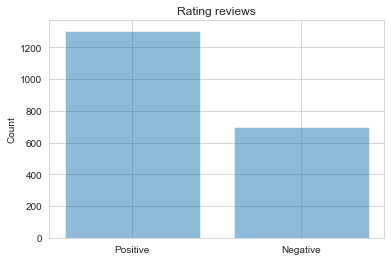

In [61]:
positive_count = (df_review['review_rating'] == 1).sum()
negative_count = (df_review['review_rating'] == 0).sum()

print("Positive reviews:", positive_count)

print("Negative reviews:", negative_count)

objects = ('Positive', 'Negative')
performance = [positive_count, negative_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Rating reviews')

plt.show()

# Text preprocessing
Actually we have only 1 feature: the review text. In order to use words as features we need to preprocess text. We created a python file (`text_processing.py`) dedicated to this aspect. Main steps are:
- Expand: remove english language contrations (es. You're -> You are);
- Tokenize: the text is cleaned of separators and special characters and then broken down into words;
- Remove punctuation
- Stemming: reducing derived words to their base form
- Lemmatize: reduce inflected form of a word to its canonical form

In [62]:
df_review_text_rating = df_review[['text', 'review_rating']].copy()
text_processing.process_text(df_review_text_rating)
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text,no_punct_text,stemmed_text,lemmatized_text,processed_text
0,The food here is pretty delicious. Highly reco...,1,The food here is pretty delicious. Highly reco...,"[The, food, here, is, pretty, delicious, ., Hi...","[The, food, here, is, pretty, delicious, Highl...","[the, food, here, is, pretti, delici, highli, ...","[the, food, here, is, pretti, delici, highli, ...",the food here is pretti delici highli recommen...
1,I made the mistake of getting the Vernon on gl...,0,I made the mistake of getting the Vernon on gl...,"[I, made, the, mistake, of, getting, the, Vern...","[I, made, the, mistake, of, getting, the, Vern...","[i, made, the, mistak, of, get, the, vernon, o...","[i, made, the, mistak, of, get, the, vernon, o...",i made the mistak of get the vernon on gluten ...
2,"I love this place for clothes, but the staff i...",0,"I love this place for clothes, but the staff i...","[I, love, this, place, for, clothes, ,, but, t...","[I, love, this, place, for, clothes, but, the,...","[i, love, thi, place, for, cloth, but, the, st...","[i, love, thi, place, for, cloth, but, the, st...",i love thi place for cloth but the staff is ru...
3,Recently opened in Westmount Mall so I had to ...,0,Recently opened in Westmount Mall so I had to ...,"[Recently, opened, in, Westmount, Mall, so, I,...","[Recently, opened, in, Westmount, Mall, so, I,...","[recent, open, in, westmount, mall, so, i, had...","[recent, open, in, westmount, mall, so, i, had...",recent open in westmount mall so i had to chec...
4,Very nice restaurant. Home cooking style servi...,1,Very nice restaurant. Home cooking style servi...,"[Very, nice, restaurant, ., Home, cooking, sty...","[Very, nice, restaurant, Home, cooking, style,...","[veri, nice, restaur, home, cook, style, serv,...","[veri, nice, restaur, home, cook, style, serv,...",veri nice restaur home cook style serv plate o...


# Split dataframe

We will split our dataframe in in training_set (80% of original dataframe) and test_set (20% of original dataframe). In addition,
we use the class [TfidfVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), from [sklearn](https://scikit-learn.org/stable/), to convert a collection of raw documents into a TF-IDF feature matrix, where TF-IDF is a numerical statistic intended to reflect the importance of a word for a document in a collection or corpus.



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
X = df_review_text_rating["processed_text"]
y = df_review_text_rating["review_rating"]

# Training set = 80%
# Test set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [65]:
vectorizer = TfidfVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

X_train_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_train_vectorizer.toarray())
X_test_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_test_vectorizer.toarray())

In [66]:
X_train_df.head(5)

,aback,abandon,abbrevi,abd,abe,abid,abil,abita,abl,about,...,zucchini,zulu,zumba,zushi,zushipok,ànd,étouffé,ñwhat,über,糯米排骨
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_test_df.head(5)

,aback,abandon,abbrevi,abd,abe,abid,abil,abita,abl,about,...,zucchini,zulu,zumba,zushi,zushipok,ànd,étouffé,ñwhat,über,糯米排骨
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms
After dataset processing we'll train the following algorithms and analyze results:
- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In order to avoid code duplication, we created 3 functions that will be used for all algorithms.


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Get best parameters
Using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) we can get best parameter for each algorithm by execute an exhaustive search over specified parameter values.

In [69]:
def get_best_parameters(algorithm, algorithm_parameters):
    gs_algorithm = GridSearchCV(algorithm, algorithm_parameters, verbose=3, scoring='f1', n_jobs=-1)

    gs_algorithm.fit(X_train_df, y_train)

    print(gs_algorithm.best_params_)

    # Find best model score
    print(gs_algorithm.score(X_train_df, y_train))

### Execute algorithm
To get algorithm score we need to pass our training set to the fit method. After this we'll pass test set to predict in order to get test set score which will be used to compare all algorithms.

In [70]:
def fit_and_predict(algorithm):

    # Training model
    algorithm.fit(X_train_df, y_train)

    # Predicting the test set results
    y_pred_algorithm = algorithm.predict(X_test_df)

    # Training score
    print(f"Score on training set: {algorithm.score(X_train_df, y_train)}")
    print(f"Score on test set: {algorithm.score(X_test_df, y_test)}")

    test_set_score = algorithm.score(X_test_df, y_test) * 100

    return y_pred_algorithm, test_set_score

### Confusion Matrix
The confusion_matrix function evaluates classification accuracy by computing the Confusion Matrix that is one of the methods to graphically show how values were predicted by the machine learning algorithm, that is, whether there is "confusion" in the classification of different classes.
Then we visually represent a confusion matrix using plot libraries.

In [71]:
def confusion_matrix_plot(algorithm_name, y_pred_algorithm):
    confusion_matrix_algorithm = confusion_matrix(y_test, y_pred_algorithm)
    df_confusion_matrix = pd.DataFrame(confusion_matrix_algorithm, columns=['Predicted 0', 'Predicted 1'],
                                           index=['True 0', 'True 1'])

    sns.heatmap(df_confusion_matrix, annot=True, fmt='d')
    plt.title(algorithm_name + " confusion matrix")
    plt.figure(figsize=(24, 14), dpi=100)
    plt.close()

### Performance metrics
For each algorithm we buil a text (and graphical) report showing the main classification metrics (Precision, Recall and F1-Score).

In [72]:
def classification_report_plot(algorithm_name, y_pred_algorithm):
    classification_report_algorithm = classification_report(y_test, y_pred_algorithm, output_dict=True)
    df_algorithm_report = pd.DataFrame(classification_report_algorithm).transpose()

    df_algorithm_report.iloc[:3, :3].plot(kind='bar', title= algorithm_name + 'classification report', rot=0)

    print(df_algorithm_report)

In [73]:
# return score, confusion matrix, classification report
def get_test_set_score(algorithm, algorithm_name, X_train_param, X_test_param):
    y_pred_algorithm, test_set_score_algorithm = fit_and_predict(algorithm)
    confusion_matrix_plot(algorithm_name, y_pred_algorithm)
    classification_report_plot(algorithm_name, y_pred_algorithm)
    return test_set_score_algorithm

## AdaBoostClassifier
AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [74]:
ada_name = 'ADA'

In [75]:
# ada_parameters = {'n_estimators': [10, 50, 100, 250, 500],
#               'learning_rate': [0.01, 0.1],
#               'algorithm': ['SAMME', 'SAMME.R']}
#
# get_best_parameters(AdaBoostClassifier(), ada_parameters)

In [76]:
ada = AdaBoostClassifier(n_estimators=250, learning_rate=0.1, algorithm='SAMME.R')

y_pred_ada, test_set_score_ada = fit_and_predict(ada)

Score on training set: 0.899375
Score on test set: 0.84


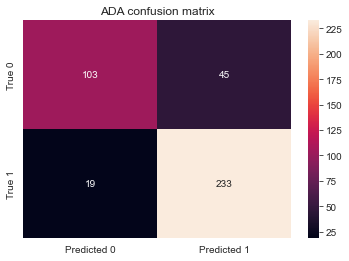

In [77]:
confusion_matrix_plot(ada_name, y_pred_ada)

              precision    recall  f1-score  support
0              0.844262  0.695946  0.762963   148.00
1              0.838129  0.924603  0.879245   252.00
accuracy       0.840000  0.840000  0.840000     0.84
macro avg      0.841196  0.810275  0.821104   400.00
weighted avg   0.840399  0.840000  0.836221   400.00


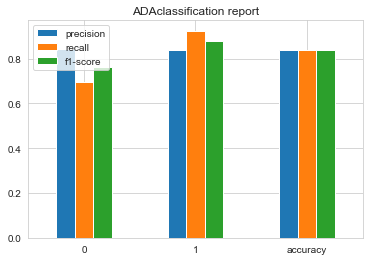

In [78]:
classification_report_plot(ada_name, y_pred_ada)

## GaussianNB
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values.


In [79]:
gnb_name = 'GNB'

In [80]:
# gnb_parameters = {'var_smoothing' : np.logspace(0,-9, num=100)}
#
# get_best_parameters(GaussianNB(), gnb_parameters)

In [81]:
gnb = GaussianNB(var_smoothing=0.0008111308307896872)

y_pred_gnb, test_set_score_gnb = fit_and_predict(gnb)

Score on training set: 0.97125
Score on test set: 0.68


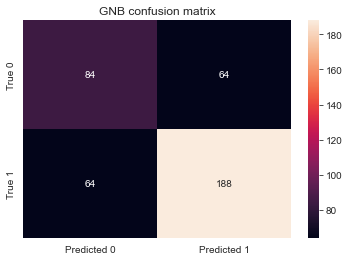

In [82]:
confusion_matrix_plot(gnb_name, y_pred_gnb)

              precision    recall  f1-score  support
0              0.567568  0.567568  0.567568   148.00
1              0.746032  0.746032  0.746032   252.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.656800  0.656800  0.656800   400.00
weighted avg   0.680000  0.680000  0.680000   400.00


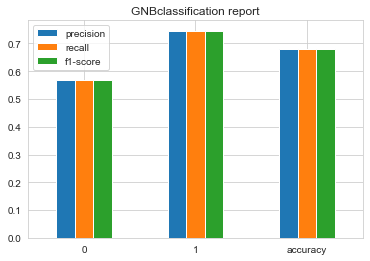

In [83]:
classification_report_plot(gnb_name, y_pred_gnb)

## DecisionTreeClassifier
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.
- Requires little data preparation.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle multi-output problems.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

In [84]:
dtc_name = 'DTC'

In [85]:
# dtc_parameters = {'splitter': ['best', 'random'],
#                   'max_features': ['auto', 'sqrt', 'log2', None],
#                   'random_state': [7, 42, 101]}
#
# get_best_parameters(DecisionTreeClassifier(), dtc_parameters)

In [86]:
dtc = DecisionTreeClassifier(splitter='random', max_features=None, random_state=7)

y_pred_dtc, test_set_score_dtc = fit_and_predict(dtc)

Score on training set: 1.0
Score on test set: 0.7125


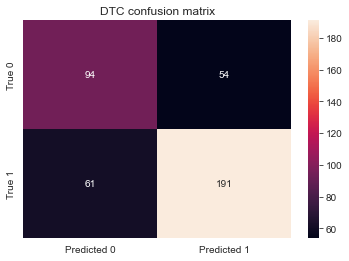

In [87]:
confusion_matrix_plot(dtc_name, y_pred_dtc)

              precision    recall  f1-score   support
0              0.606452  0.635135  0.620462  148.0000
1              0.779592  0.757937  0.768612  252.0000
accuracy       0.712500  0.712500  0.712500    0.7125
macro avg      0.693022  0.696536  0.694537  400.0000
weighted avg   0.715530  0.712500  0.713796  400.0000


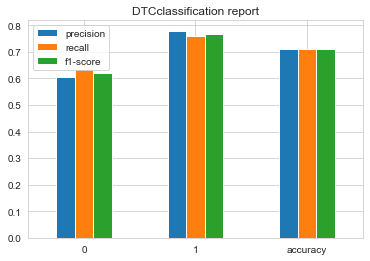

In [88]:
classification_report_plot(dtc_name, y_pred_dtc)

## LogisticRegression
Logistic Regression is a supervised learning technique which is used to evaluate the relationship between dependent and independent variables by probabilities using a logistic function. These probabilities will be transformed into binary values between 0 and 1 to proceed then with the prediction.

This algorithm is used the most in binary classification problems such as predicting whether an email is a spam or not, whether a tumor is malignant or, like in our situation, tell if a review is positive or negative.

In [89]:
lr_name = 'LR'

In [90]:
# lr_parameters = {'C': [0.001, 0.01, 0.1, 1.0],
#               'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
#               'random_state': [7, 42, 101]}
#
# get_best_parameters(LogisticRegression(), lr_parameters)

In [91]:
lr = LogisticRegression(C=1.0, solver='newton-cg', random_state=7)

y_pred_lr, test_set_score_lr = fit_and_predict(lr)

Score on training set: 0.914375
Score on test set: 0.805


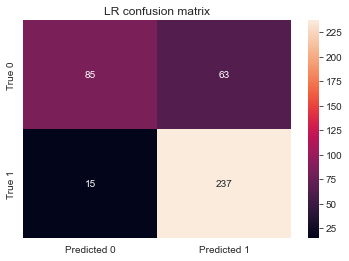

In [92]:
confusion_matrix_plot(lr_name, y_pred_lr)

              precision    recall  f1-score  support
0                0.8500  0.574324  0.685484  148.000
1                0.7900  0.940476  0.858696  252.000
accuracy         0.8050  0.805000  0.805000    0.805
macro avg        0.8200  0.757400  0.772090  400.000
weighted avg     0.8122  0.805000  0.794607  400.000


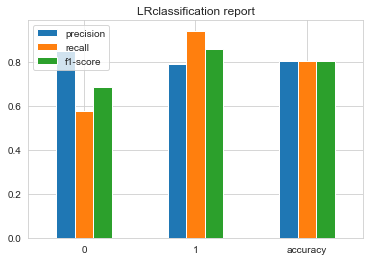

In [93]:
classification_report_plot(lr_name, y_pred_lr)

## KNeighborsClassifier
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

In [94]:
knc_name = 'KNC'

In [95]:
# knc_parameters = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#               'algorithm': ['ball_tree']}
#
# get_best_parameters(KNeighborsClassifier(n_jobs=-1), knc_parameters)

In [96]:
knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=31, weights='uniform', n_jobs=-1)

y_pred_knc, test_set_score_knc = fit_and_predict(knc)

Score on training set: 0.780625
Score on test set: 0.7775


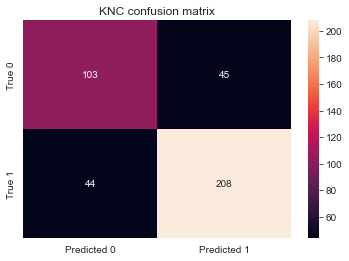

In [97]:
confusion_matrix_plot(knc_name, y_pred_knc)

              precision    recall  f1-score   support
0              0.700680  0.695946  0.698305  148.0000
1              0.822134  0.825397  0.823762  252.0000
accuracy       0.777500  0.777500  0.777500    0.7775
macro avg      0.761407  0.760671  0.761034  400.0000
weighted avg   0.777196  0.777500  0.777343  400.0000


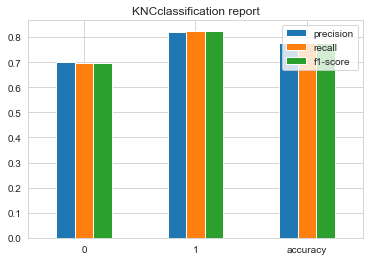

In [98]:
classification_report_plot(knc_name, y_pred_knc)

## Support Vector Machine
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


In [99]:
svc_name = 'SVC'

In [100]:
# svc_parameters = {'C': [0.001, 0.01, 0.1, 1.0],
#               'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
#               'decision_function_shape': ['ovo', 'ovr']}
#
# get_best_parameters(SVC(), svc_parameters)

In [101]:
svc = SVC(C=1.0, kernel='linear', decision_function_shape='ovo')

y_pred_svc, test_set_score_svc = fit_and_predict(svc)

Score on training set: 0.976875
Score on test set: 0.85


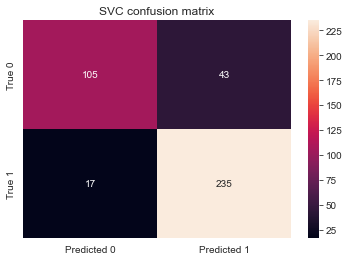

In [102]:
confusion_matrix_plot(svc_name, y_pred_svc)

              precision    recall  f1-score  support
0              0.860656  0.709459  0.777778   148.00
1              0.845324  0.932540  0.886792   252.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.852990  0.821000  0.832285   400.00
weighted avg   0.850997  0.850000  0.846457   400.00


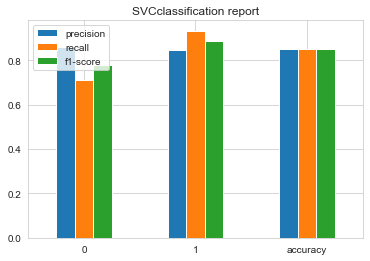

In [103]:
classification_report_plot(svc_name, y_pred_svc)

## RandomForestClassifier
This algorithm is a supervised learning technique where the "forest" terms points to a set of decision trees, obtained by aggregation using "bagging" algorithm, that should be trained. In fact, Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [104]:
rfc_name = 'RFC'

In [105]:
# rfc_parameters = {'n_estimators': [10, 50, 100, 250, 500],
#               'random_state': [7, 42, 101]}
#
# get_best_parameters(RandomForestClassifier(), rfc_parameters)

In [106]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

y_pred_rfc, test_set_score_rfc = fit_and_predict(rfc)

Score on training set: 1.0
Score on test set: 0.78


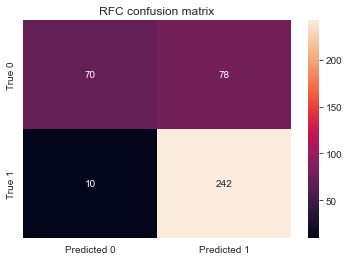

In [107]:
confusion_matrix_plot(rfc_name, y_pred_rfc)

              precision    recall  f1-score  support
0              0.875000  0.472973  0.614035   148.00
1              0.756250  0.960317  0.846154   252.00
accuracy       0.780000  0.780000  0.780000     0.78
macro avg      0.815625  0.716645  0.730094   400.00
weighted avg   0.800187  0.780000  0.760270   400.00


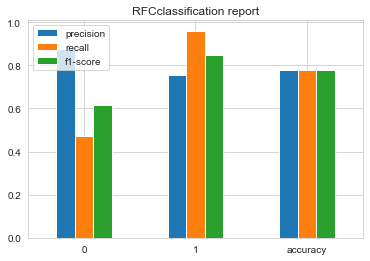

In [108]:
classification_report_plot(rfc_name, y_pred_rfc)

## Plot algorithm accuracy
After running all the algorithms, we plot all the accuracies to decide the best algorithm to perform the task. In this case the best one is SVC.

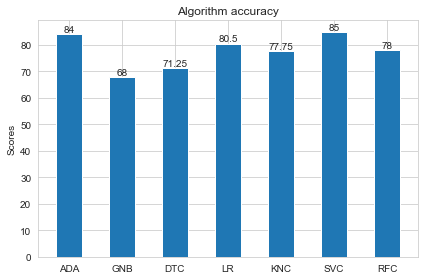

In [113]:
labels = [ada_name, gnb_name, dtc_name, lr_name, knc_name, svc_name, rfc_name]
score_values = [test_set_score_ada, test_set_score_gnb, test_set_score_dtc, test_set_score_lr, test_set_score_knc, test_set_score_svc, test_set_score_rfc]

x = np.arange(len(labels)) # The label locations
width = 0.35 # The width of the space between bar
width_bar = 0.50

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_values, width_bar, label='accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Algorithm accuracy')
ax.set_xticks(x - width/2, labels)

ax.bar_label(rects1)

fig.tight_layout()

plt.show()

# Export SVC Model
We exported SVC model using Pickle in order to use it as prediction algorithm.

[Pickle](https://docs.python.org/3/library/pickle.html) library is used for serializing a Python object structure.

In [110]:
import pickle

In [111]:
pickle.dump(svc, open('../models/svc_model.pkl', 'wb'))
pickle.dump(vectorizer, open('../models/vectorizer.pkl', 'wb'))

# Predict Review Test
Test exported module. The code is in `predictions.py` because we'll use it later.

In [112]:
from utils import predictions

predictions.predict_review("This restaurant is very very bad!")

array([0])